In [ ]:
!pip install google-api-python-client

In [ ]:
pip install google-auth-oauthlib


Base de datos de City Bikes de la ciudad de Barcelona


In [4]:
import requests

# URL de la API de City Bikes para obtener información de las estaciones en Barcelona
api_url = 'https://api.citybik.es/v2/networks/bicing'

# Realizar una solicitud HTTP GET a la API de City Bikes
response = requests.get(api_url)

# Si la solicitud es exitosa, mostrar la respuesta en la consola
if response.status_code == 200:
    print(response.text)
else:
    print('Error al obtener la información de la API')



{"network":{"company":["Barcelona de Serveis Municipals, S.A. (BSM)","CESPA","PBSC"],"gbfs_href":"https://api.bsmsa.eu/ext/api/bsm/gbfs/v2/","href":"/v2/networks/bicing","id":"bicing","location":{"city":"Barcelona","country":"ES","latitude":41.3850639,"longitude":2.1734035},"name":"Bicing","stations":[{"empty_slots":23,"extra":{"address":"CARRER DE LA MARINA,25-33","altitude":7.0,"ebikes":1,"has_ebikes":true,"last_updated":1680375081,"normal_bikes":19,"post_code":"08005","renting":1,"returning":1,"slots":43,"uid":69},"free_bikes":20,"id":"8b92416c1f4a49323575c4ce26f0fc8c","latitude":41.3881248,"longitude":2.1951871,"name":"CARRER DE LA MARINA,25-33","timestamp":"2023-04-01T18:54:54.270000Z"},{"empty_slots":3,"extra":{"address":"C / PROVEN\u00c7A, 241","altitude":37.0,"ebikes":3,"has_ebikes":true,"last_updated":1680375102,"normal_bikes":11,"post_code":"08008","renting":1,"returning":1,"slots":18,"uid":92},"free_bikes":14,"id":"9a40a01fc442d4f03d0c825280e7f70e","latitude":41.3938861,"lon

Visualización en forma de tabla.
Es una tabla que muestra información de estacionamientos de bicicletas. Hay varias columnas que describen características de las estaciones, como la ubicación, el número de bicicletas disponibles, el nombre y la hora en que se obtuvo la información. También hay una columna llamada "extra" que parece contener información adicional sobre la estación en formato de diccionario.

In [1]:
import requests
import pandas as pd

# URL de la API de City Bikes para obtener información de las estaciones en Barcelona
api_url = 'https://api.citybik.es/v2/networks/bicing'

# Realizar una solicitud HTTP GET a la API de City Bikes
response = requests.get(api_url)

# Si la solicitud es exitosa, cargar los datos en un DataFrame de Pandas
if response.status_code == 200:
    data = response.json()['network']['stations']
    df = pd.DataFrame(data)
    print(df)
else:
    print('Error al obtener la información de la API')


     empty_slots                                              extra  \
0             23  {'address': 'CARRER DE LA MARINA,25-33', 'alti...   
1              3  {'address': 'C / PROVENÇA, 241', 'altitude': 3...   
2             21  {'address': 'C/ BRUC, 130', 'altitude': 34.0, ...   
3             26  {'address': 'C/ PARE MARIANA, 24', 'altitude':...   
4              5  {'address': 'PL.VALENTÍ ALMIRALL', 'altitude':...   
..           ...                                                ...   
499           17  {'address': 'C/ RAMON ALBÓ, 1', 'altitude': 56...   
500           41  {'address': 'AV. LITORAL, 172', 'altitude': 5....   
501           15  {'address': 'C/ NOU DE LA RAMBLA, 164', 'altit...   
502            2  {'address': 'C/ ALMOGÀVERS, 63', 'altitude': 1...   
503           15  {'address': 'TRAV. DE GRÀCIA, 92 / VIA AUGUSTA...   

     free_bikes                                id   latitude  longitude  \
0            20  8b92416c1f4a49323575c4ce26f0fc8c  41.388125   2.195187 

Número de filas y columnas

In [25]:
import requests
import pandas as pd

# URL de la API de City Bikes para obtener información de las estaciones en Barcelona
api_url = 'https://api.citybik.es/v2/networks/bicing'

# Realizar una solicitud HTTP GET a la API de City Bikes
response = requests.get(api_url)

# Si la solicitud es exitosa, cargar los datos en un DataFrame de Pandas
if response.status_code == 200:
    data = response.json()['network']['stations']
    df = pd.DataFrame(data)
    print("Número de filas: ", df.shape[0])
    print("Número de columnas: ", df.shape[1])
else:
    print('Error al obtener la información de la API')


Número de filas:  504
Número de columnas:  8


Nombres de las columnas

In [2]:
print(df.columns)


Index(['empty_slots', 'extra', 'free_bikes', 'id', 'latitude', 'longitude',
       'name', 'timestamp'],
      dtype='object')


Búsqueda de valores nulos

In [5]:
df.isnull().sum()

empty_slots    0
extra          0
free_bikes     0
id             0
latitude       0
longitude      0
name           0
timestamp      0
dtype: int64

Visualización de datos faltantes o nulos (missing values) en un DataFrame. No se observa ninguno.

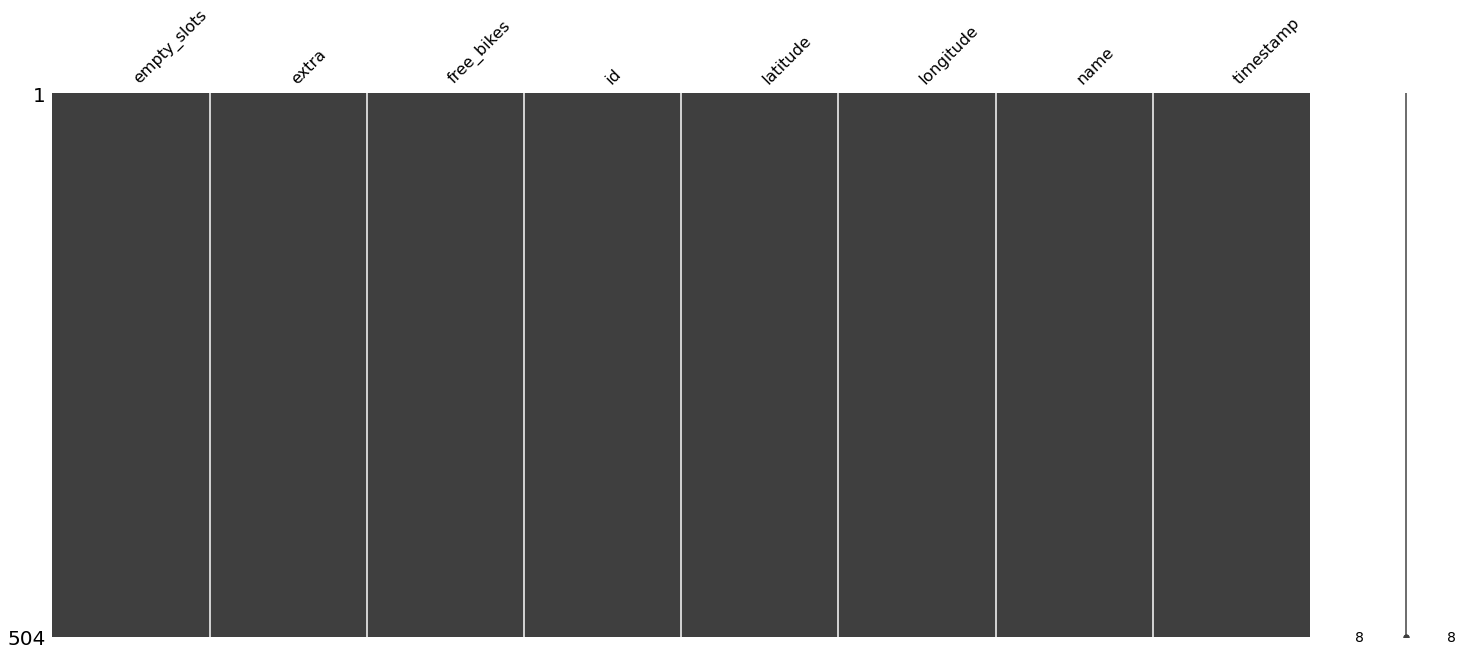

In [6]:
import missingno as msno

msno.matrix(df)
plt.show()

Mapa que muestre la distribución geográfica de estos estacionamientos

In [19]:
import folium

# crea un mapa centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# agrega marcadores para cada estacionamiento de bicicletas
for index, row in df.iterrows():
    latitud = row['latitude']
    longitud = row['longitude']
    nombre = row['name']
    folium.Marker([latitud, longitud], popup=nombre).add_to(mapa)

# muestra el mapa
mapa



Observar las 20 estaciones con espacios vacios

In [13]:
top_stations = df.sort_values('free_bikes', ascending=False).head(20)
top_stations = top_stations.loc[:, ['name', 'free_bikes']]
print(top_stations)


                                          name  free_bikes
341              C/ RAMON TRIAS FARGAS, 19 (D)          42
110             RAMBLA DE GUIPÚSCOA, 43/FLUVIÀ          39
186  GRAN VIA DE LES CORTS CATALANES, 1157 (D)          37
50               C/ AGUSTÍ DURAN I SANPERE, 10          33
139                           PL. PAU VILA (D)          32
429                           C/ RIERA ALTA, 6          31
387   GRAN VIA DE LES CORTS CATALANES, 179 (D)          30
471                          C/ SARDENYA,  178          27
411       PG.DE LLUíS COMPANYS (ARC DE TRIOMF)          27
447                        C/ DE BONAVISTA, 14          26
396                             PG. PUJADES, 2          26
190                          PL. CATALUNYA, 22          26
410       GRAN VIA DE LES CORTS CATALANES, 592          26
349                  C/ RAMON TRIAS FARGAS, 23          26
502                          C/ ALMOGÀVERS, 63          25
386            C/ DE L'ENERGIA, 2 / ALTS FORNS          

Veo gráficamente lo mismo de la tabla

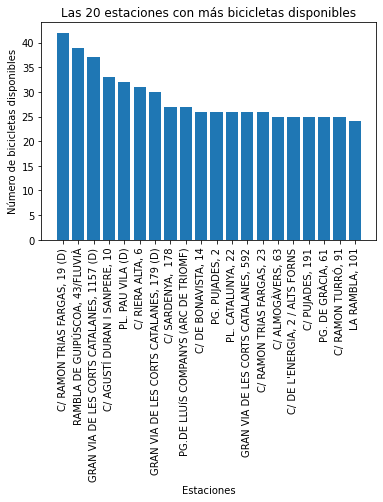

In [16]:
import matplotlib.pyplot as plt

# Ordenar el dataframe por número de bicicletas disponibles y seleccionar las 20 estaciones más populares
top_stations = df.sort_values('free_bikes', ascending=False).head(20)

# Crear el gráfico de barras
plt.bar(top_stations['name'], top_stations['free_bikes'])
plt.xticks(rotation=90) # Rotar el eje x para que los nombres de las estaciones sean legibles
plt.xlabel('Estaciones')
plt.ylabel('Número de bicicletas disponibles')
plt.title('Las 20 estaciones con más bicicletas disponibles')
plt.show()



Veo en el mapa las 20 estaciones con más espacios vacios para buscar si se encuentran en una zona particular pero no encuentro ningún patrón.

In [21]:
import folium

# crea un mapa centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# filtra el dataframe original para dejar solo las 20 estaciones con más espacios libres
top_stations = df.sort_values('free_bikes', ascending=False).head(20)
top_stations_names = top_stations['name'].tolist() # convierte los nombres de las estaciones en una lista

# agrega marcadores solo para estas estaciones
for index, row in df.iterrows():
    if row['name'] in top_stations_names:
        latitud = row['latitude']
        longitud = row['longitude']
        nombre = row['name']
        folium.Marker([latitud, longitud], popup=nombre).add_to(mapa)

# muestra el mapa
mapa


Instalo librería Spotipy 

In [ ]:
pip install spotipy


Observo una serie de datos de The Beatles en Spotify

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Ingresar tu Client ID y Client Secret
client_id = '629a77a092d641cb9b3aa58209f35180'
client_secret = 'ce2eb985f68144cbb2ec4b38b5ea5076'

# Autenticación de cliente
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# ID de The Beatles
artist_id = '3WrFJ7ztbogyGnTHbHJFl2'

# Obtener información sobre The Beatles
artist_info = sp.artist(artist_id)

# Imprimir información
print('Nombre del artista:', artist_info['name'])
print('Seguidores:', artist_info['followers']['total'])
print('Popularidad:', artist_info['popularity'])
print('Géneros:', artist_info['genres'])

# Obtener los álbumes de The Beatles
albums = sp.artist_albums(artist_id, album_type='album', country='US')
print('Álbumes de estudio:')
for album in albums['items']:
    print(album['name'], '-', album['release_date'])
    
# Obtener los sencillos de The Beatles
singles = sp.artist_albums(artist_id, album_type='single', country='US')
print('Sencillos:')
for single in singles['items']:
    print(single['name'], '-', single['release_date'])

# Obtener las 10 canciones más populares de The Beatles
top_tracks = sp.artist_top_tracks(artist_id, country='US')
print('Canciones más populares:')
for track in top_tracks['tracks']:
    print(track['name'], '-', track['album']['name'])


Nombre del artista: The Beatles
Seguidores: 24969827
Popularidad: 85
Géneros: ['beatlesque', 'british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock']
Álbumes de estudio:
Revolver (Super Deluxe) - 2022-10-28
Get Back (Rooftop Performance) - 2022-01-28
Let It Be (Super Deluxe) - 2021-10-15
Abbey Road (Super Deluxe Edition) - 2019-09-27
The Beatles - 2018-11-09
Live At The Hollywood Bowl - 2016-09-09
Let It Be... Naked (Remastered) - 2014-01-01
Yellow Submarine Songtrack - 2014-01-01
On Air - Live At The BBC (Vol.2) - 2013-11-11
1 (Remastered) - 2000-11-13
Live At The BBC (Remastered) - 1994-11-30
Let It Be (Remastered) - 1970-05-08
Abbey Road (Remastered) - 1969-09-26
Yellow Submarine (Remastered) - 1969-01-17
The Beatles (Remastered) - 1968-11-22
Magical Mystery Tour (Remastered) - 1967-11-27
Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition) - 1967-06-01
Sgt. Pepper's Lonely Hearts Club Band (Remastered) - 1967-06-01
Sgt. Pepper's Lonely Hearts Club Band (Super

Contemplo las 10 canciones más populares

In [3]:
# ID de The Beatles
artist_id = '3WrFJ7ztbogyGnTHbHJFl2'

# Obtener las canciones más populares de The Beatles
top_tracks = sp.artist_top_tracks(artist_id)['tracks']

# Ordenar las canciones por popularidad
sorted_tracks = sorted(top_tracks, key=lambda x: x['popularity'], reverse=True)

# Imprimir la lista de canciones en orden de popularidad
for i, track in enumerate(sorted_tracks):
    print(f"{i+1}. {track['name']} - popularidad: {track['popularity']}")


1. Here Comes The Sun - Remastered 2009 - popularidad: 82
2. Let It Be - Remastered 2009 - popularidad: 77
3. Yesterday - Remastered 2009 - popularidad: 77
4. Come Together - Remastered 2009 - popularidad: 77
5. Blackbird - Remastered 2009 - popularidad: 75
6. Twist And Shout - Remastered 2009 - popularidad: 75
7. In My Life - Remastered 2009 - popularidad: 75
8. Hey Jude - Remastered 2015 - popularidad: 73
9. I Want To Hold Your Hand - Remastered 2015 - popularidad: 72
10. Something - Remastered 2009 - popularidad: 72


Gráfico para comparar.
He buscado ver si podría hacer análisis de hace unos años con los actuales en relación a la popularidad pero Spotify solo brinda datos de la popularidad actual.

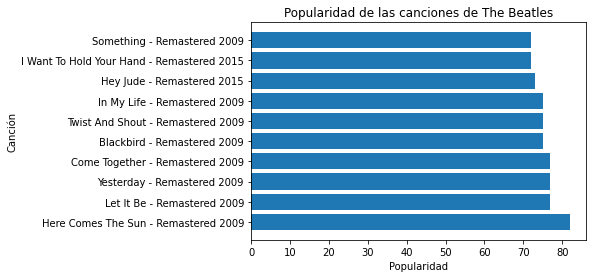

In [9]:
import matplotlib.pyplot as plt

# ID de The Beatles
artist_id = '3WrFJ7ztbogyGnTHbHJFl2'

# Obtener las canciones más populares de The Beatles
top_tracks = sp.artist_top_tracks(artist_id)['tracks']

# Ordenar las canciones por popularidad
sorted_tracks = sorted(top_tracks, key=lambda x: x['popularity'], reverse=True)

# Crear listas con los nombres y popularidades de las canciones
names = [track['name'] for track in sorted_tracks]
popularity = [track['popularity'] for track in sorted_tracks]

# Crear un gráfico de barras horizontales con la popularidad de las canciones
plt.barh(names, popularity)

# Configurar el título y los ejes del gráfico
plt.title('Popularidad de las canciones de The Beatles')
plt.xlabel('Popularidad')
plt.ylabel('Canción')

# Mostrar el gráfico
plt.show()
